## Lab 5: Insurance Costs

#### Part 1: Data Exploration

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

#### 1 & 2.

In [2]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance = insurance.dropna()
insurance.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [3]:
#| echo: false
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


#### 3.

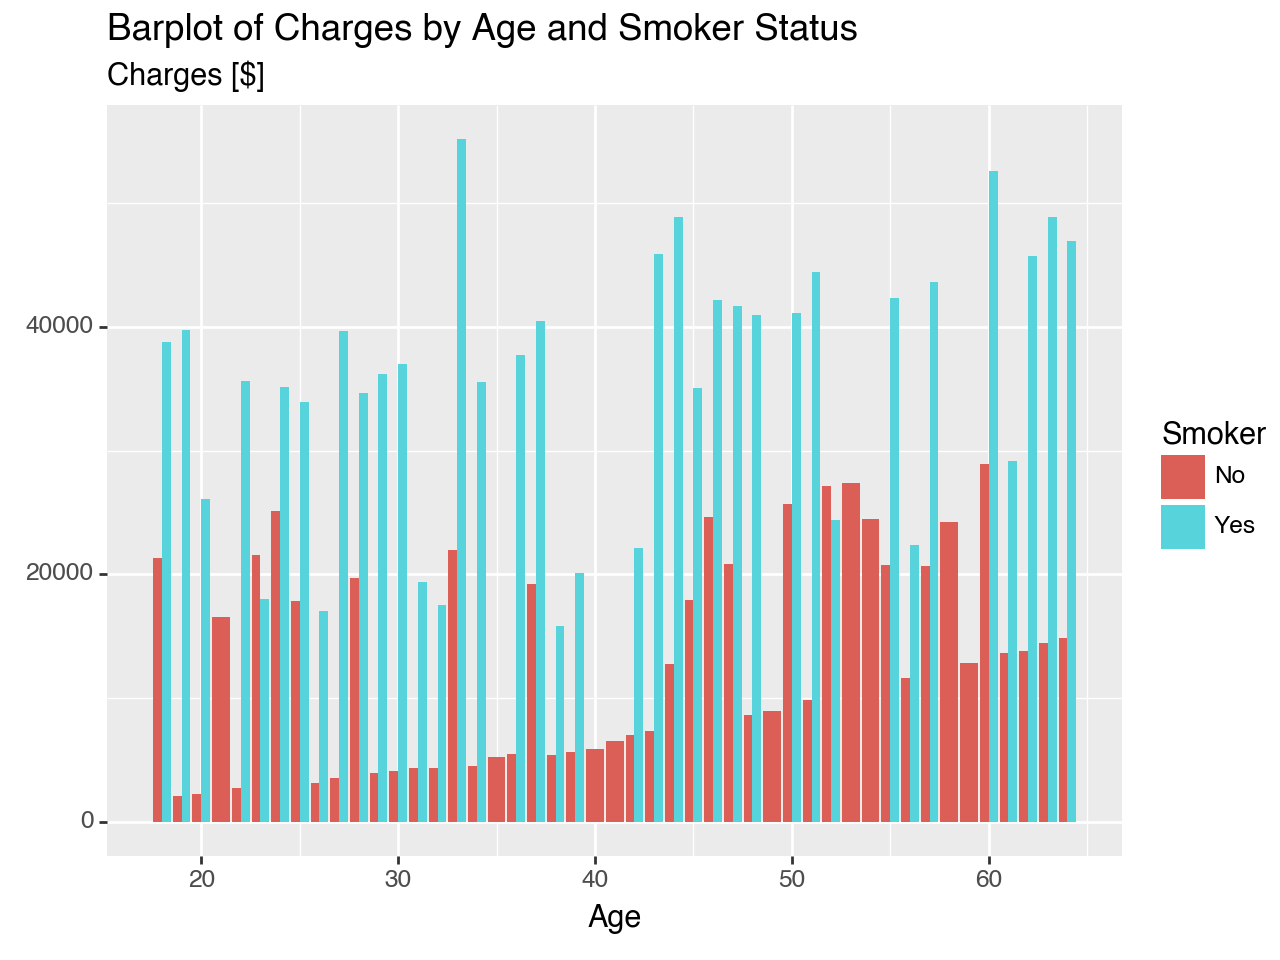

<Figure Size: (640 x 480)>

In [4]:
from plotnine import ggplot, aes, labs, geom_bar, scale_fill_discrete
(ggplot(insurance, aes(x = "age", y = "charges", fill = "smoker")) +
    geom_bar(stat = "identity", position = "dodge") + 
    labs(
        x = "Age",
        y = "",
        subtitle = "Charges [$]",
        title = "Barplot of Charges by Age and Smoker Status",
        fill = "Smoker"
    ) +
    scale_fill_discrete(labels = {"yes": "Yes", "no": "No"})
)

In the plot above, it can be seen that individual medical costs rise on average as a person gets older and a person who smokes has on average higher medical costs. There are a couple of interesting spikes for non-smokers that I would assume are related to more serious injuries and illnesses.

#### 3 Cont.

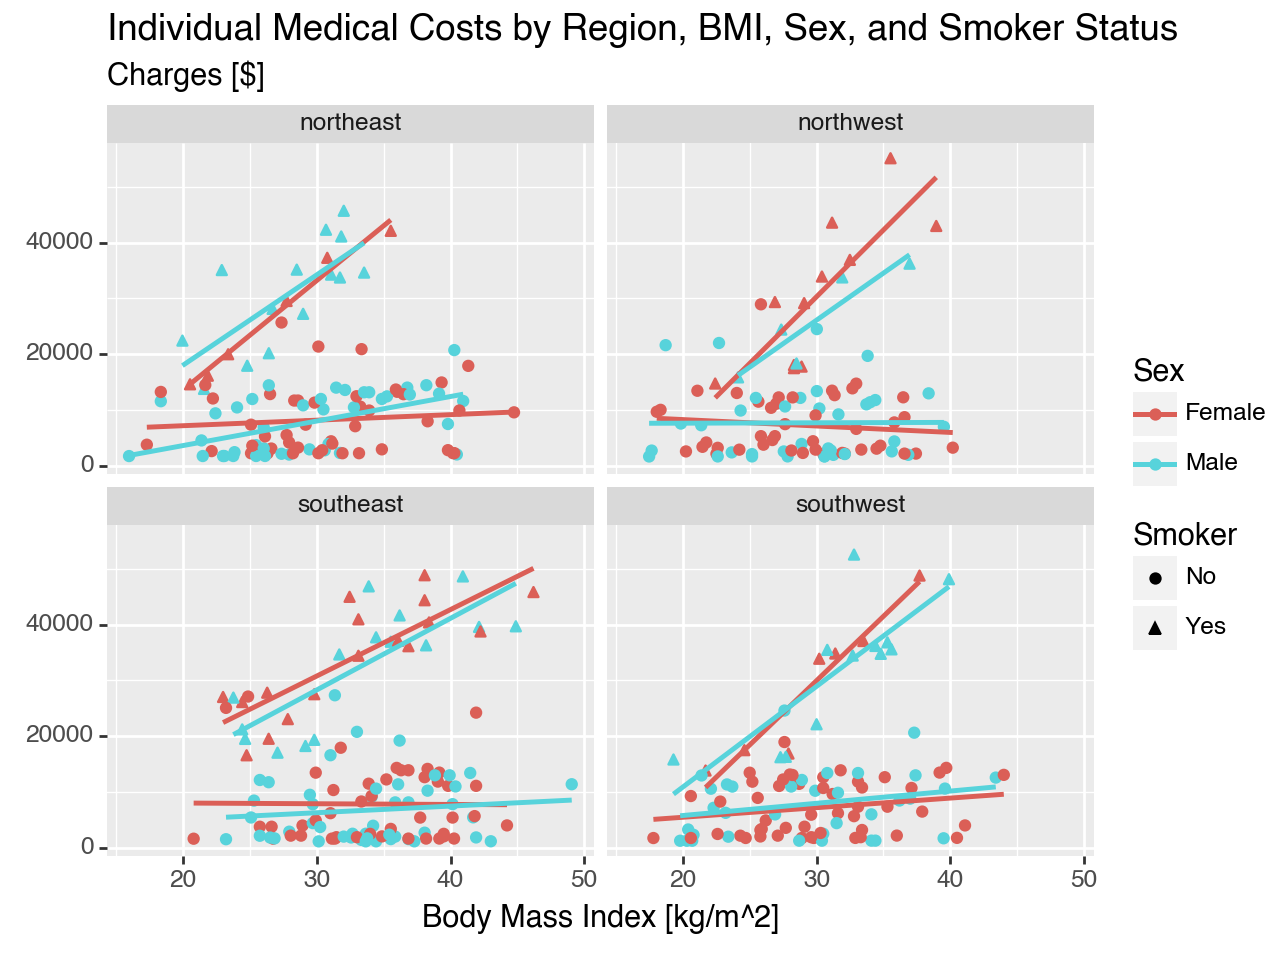

<Figure Size: (640 x 480)>

In [5]:
from plotnine import geom_point, geom_smooth, facet_wrap, scale_color_discrete, scale_shape_discrete
(ggplot(insurance, aes(x = "bmi", y = "charges", color = "sex", shape = "smoker")) +
    geom_point() + 
    geom_smooth(method = "ols", se = False) + 
    facet_wrap(facets = "region") + 
    scale_color_discrete(labels = {"female": "Female", "male": "Male"}) + 
    scale_shape_discrete(labels = {"no": "No", "yes": "Yes"}) +
    labs(
        x = "Body Mass Index [kg/m^2]",
        y = "",
        subtitle = "Charges [$]",
        title = "Individual Medical Costs by Region, BMI, Sex, and Smoker Status",
        color = "Sex",
        shape = "Smoker"
    )
)

The graph above shows that billing costs do not appear to change based on region and sex, but are marginally dependent on BMI and heavily dependent on wether a person is a smoker or not. 

## Part 2: Simple Linear Models

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#### 1.

In [7]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

my_pipeline = Pipeline(
    [("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_age = X_test
X_test_age["pred"] = y_pred

r2_age =  r2_score(y_true = y_test, y_pred = y_pred)
mse_age = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_age = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_age} \nMSE: {mse_age} \nAge Coefficient: {coef_age[0]}")

R^2: 0.019758126681116095 
MSE: 117863248.28003095 
Age Coefficient: 254.1927749185891


The model fit for the linear model with only age does not predict the individual medical costs well, as the $R^2$ value is very low at a value of .03 and the MSE is extremely large. The coefficient estimate of 244 means that for each year older a person gets, their individual medical costs will increase by an average of $244.

#### 2.

In [8]:
X = insurance[["age", "sex"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["sex"])],
    remainder = "passthrough"
)

my_pipeline = Pipeline(
    [("dummify", ct), 
    ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_as = X_test
X_test_as["pred"] = y_pred

r2_as =  r2_score(y_true = y_test, y_pred = y_pred)
mse_as = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_as = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_as} \nMSE: {mse_as} \nSex Coefficient: {coef_as[0]} \nAge Coefficient: {coef_as[1]}")

R^2: 0.04909432944851 
MSE: 111886669.80412082 
Sex Coefficient: 1659.0680682792436 
Age Coefficient: 238.53995764539224


#### 3.

In [9]:
X = insurance[["age", "smoker"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["smoker"])],
    remainder = "passthrough"
)

my_pipeline = Pipeline(
    [("dummify", ct), 
    ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_smoker = X_test
X_test_smoker["pred"] = y_pred

r2_smoker =  r2_score(y_true = y_test, y_pred = y_pred)
mse_smoker = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_smoker = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_smoker} \nMSE: {mse_smoker} \nSmoker Coefficient: {coef_smoker[0]} \nAge Coefficient: {coef_smoker[1]}")

R^2: 0.793456614275289 
MSE: 38691221.85757077 
Smoker Coefficient: 22861.764309220936 
Age Coefficient: 250.65588316122088


#### 4.
I believe that the model from question 3 is a better model because it has a higher $R^2$ value, .726 > .119, and a lower MSE, 40,748,275 < 135,234,540

## Part 3: Multiple Linear Regressions

#### 1.

In [10]:
X = insurance[["age", "bmi"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

my_pipeline = Pipeline(
    [("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_ab = X_test
X_test_ab["pred"] = y_pred

r2_ab =  r2_score(y_true = y_test, y_pred = y_pred)
mse_ab = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_ab = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_ab} \nMSE: {mse_ab} \nAge Coefficient: {coef_ab[0]} \nBMI Coefficient: {coef_ab[1]}")

R^2: 0.15036849218248616 
MSE: 136956433.3123665 
Age Coefficient: 201.834630721342 
BMI Coefficient: 251.57953723817656


The MSE and $R^2$ values for the model using age and bmi are very similar to the model that is only using age. However, the MSE and $R^2$ values for the model with age and bmi are slightly better than the values for the model with only age.

#### 2.

In [11]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
pt = PolynomialFeatures(degree = (1, 2))

my_pipeline = Pipeline(
    [("square", pt),
    ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_age2 = X_test
X_test_age2["pred"] = y_pred

r2_age2 =  r2_score(y_true = y_test, y_pred = y_pred)
mse_age2 = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_age2 = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_age2} \nMSE: {mse_age2} \nAge Coefficient: {coef_age2[1]} \nAge^2 Coefficient: {coef_age2[2]}")

R^2: 0.1721020706503611 
MSE: 99211271.05990337 
Age Coefficient: 381.26479006345454 
Age^2 Coefficient: -2.336021994893599


The MSE and $R^2$ values for the model using age and $\text{age}^2$ are very similar to the model that is only using age. However, the MSE and $R^2$ values for the model with age and $\text{age}^2$ are slightly better than the values for the model with only age.

#### 3.

In [12]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
pt = PolynomialFeatures(degree = (1, 4))

my_pipeline = Pipeline(
    [("four_factor", pt),
    ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_age4 = X_test
X_test_age4["pred"] = y_pred

r2_age4 =  r2_score(y_true = y_test, y_pred = y_pred)
mse_age4 = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_age4 = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_age4} \nMSE: {mse_age4} \nAge Coefficient: {coef_age4[1]} \nAge^2 Coefficient: {coef_age4[2]} \nAge^3 Coefficient: {coef_age4[3]} \nAge^4 Coefficient: {coef_age4[4]}")

R^2: 0.04988772986816714 
MSE: 162280850.89649317 
Age Coefficient: -8915.200456022312 
Age^2 Coefficient: 396.46014127253363 
Age^3 Coefficient: -7.139634269474556 
Age^4 Coefficient: 0.04540305157206603


The MSE and $R^2$ values for the model using age and $\text{age}^4$ are very similar to the model that is only using age. However, the MSE and $R^2$ values for the model with age and $\text{age}^4$ are slightly worse than the values for the model with only age.

#### 4.

In [13]:
X = insurance[["age"]]
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
pt = PolynomialFeatures(degree = (1, 12))

my_pipeline = Pipeline(
    [("twelve_factor", pt),
    ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_age12 = X_test
X_test_age12["pred"] = y_pred

r2_age12 =  r2_score(y_true = y_test, y_pred = y_pred)
mse_age12 = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_age12 = fitted_pipeline.named_steps["ols"].coef_

print(f"R^2: {r2_age12} \nMSE: {mse_age12}")
for i in range(len(coef_age12)):
    if i == 0:
        continue
    elif i == 1:
        print(f"Age Coefficient: {coef_age12[i]}")
    else:
        print(f"Age^{i} Coefficient: {coef_age12[i]}")

R^2: 0.13483878512959124 
MSE: 137260949.70041457
Age Coefficient: -6.679351310524882e-06
Age^2 Coefficient: -9.861736423972945e-08
Age^3 Coefficient: -6.196000984031931e-07
Age^4 Coefficient: -1.0270647609475508e-05
Age^5 Coefficient: -0.00012269900380035306
Age^6 Coefficient: -0.0008198052678389708
Age^7 Coefficient: 0.0001044933828169325
Age^8 Coefficient: -5.4323884033562225e-06
Age^9 Coefficient: 1.48845928729534e-07
Age^10 Coefficient: -2.273712263353334e-09
Age^11 Coefficient: 1.8382555673892465e-11
Age^12 Coefficient: -6.148614112294745e-14


The MSE and $R^2$ values for the model using age and $\text{age}^{12}$ are very similar to the model that is only using age. However, the MSE and $R^2$ values for the model with age and $\text{age}^{12}$ are slightly better than the values for the model with only age.

#### 5.
According to the MSE and $R^2$, the quadratic model is the best model. While this model does appear to fit the data well, I believe that there is a better model because this model relies solely on age squared while smoking status appears to be an important factor that is excluded from the model.

#### 6.

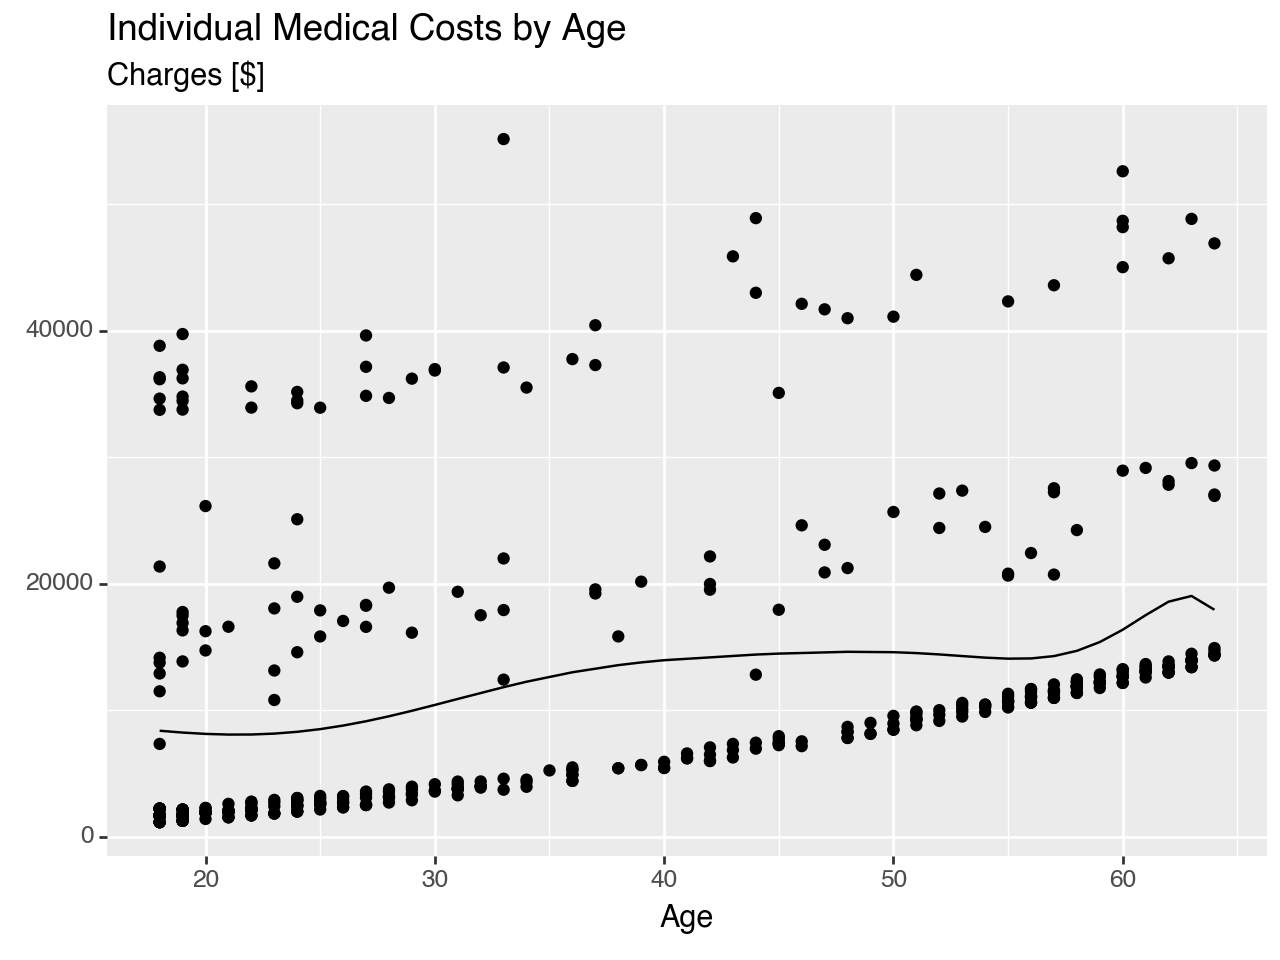

<Figure Size: (640 x 480)>

In [15]:
from plotnine import geom_line
(ggplot(insurance, aes(x = "age", y = "charges")) +
    geom_point() +
    geom_line(X_test_age12, aes(x = "age", y = "pred"), inherit_aes = False) +
    labs(
        x = "Age",
        y = "",
        subtitle = "Charges [$]",
        title = "Individual Medical Costs by Age"
    )
)

## Part 4: New Data

In [16]:
new_data = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
new_data.describe()

,age,bmi,charges
count,143.000000,143.000000,143.000000
mean,39.902098,29.891434,12573.571373
std,16.624822,5.786784,12495.668607
min,18.000000,18.600000,1121.873900
25%,21.500000,25.477500,3072.870450
50%,42.000000,29.300000,9634.538000
75%,56.000000,33.495000,14269.826100
max,64.000000,53.130000,63770.428010


In [17]:
#| echo: false
new_data.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


#### Age

In [38]:
X_train = insurance[["age"]]
y_train = insurance["charges"]

X_test = new_data[["age"]]
y_test = new_data["charges"]

lr = LinearRegression()

my_pipeline = Pipeline(
    [("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_nage = X_test.copy()
X_test_nage["pred"] = y_pred

r2_nage =  r2_score(y_true = y_test, y_pred = y_pred)
mse_nage = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_nage = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_nage} \nMSE: {mse_nage} \nAge Coefficient: {coef_nage[0]}")

R^2: 0.12236515675533055 
MSE: 136077136.50195494 
Age Coefficient: 228.79904937243666


#### Age and BMI

In [87]:
X_train = insurance[["age", "bmi"]]
X_test = new_data[["age", "bmi"]]

my_pipeline = Pipeline(
    [("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_nab = X_test.copy()
X_test_nab["pred"] = y_pred

r2_nab =  r2_score(y_true = y_test, y_pred = y_pred)
mse_nab = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_nab = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_nab} \nMSE: {mse_nab} \nAge Coefficient: {coef_nab[0]} \nBMI Coefficient: {coef_nab[1]}")

R^2: 0.14455628272331222 
MSE: 132636406.1108129 
Age Coefficient: 216.29721472342518 
BMI Coefficient: 283.20380125540294


#### Age, BMI, and their interaction with smoker

In [170]:
X_train = insurance[["age", "bmi", "smoker"]]
X_test = new_data[["age", "bmi", "smoker"]]

enc = OneHotEncoder(sparse_output=False, drop="first")

ct_dummies = ColumnTransformer(
    [("Dummify", enc, ["smoker"])],
    remainder="passthrough"
).set_output(transform="pandas")

ct_inter_1 = ColumnTransformer(
    [("Interaction_1", PolynomialFeatures(interaction_only=True), ["Dummify__smoker_yes", "remainder__age"])],
    remainder = "passthrough"
).set_output(transform="pandas")

ct_inter_2 = ColumnTransformer(
    [("Interaction_2", PolynomialFeatures(interaction_only=True), ["Interaction_1__Dummify__smoker_yes", "remainder__remainder__bmi"])],
    remainder = "passthrough"
).set_output(transform="pandas")

X_train_dummified = ct_dummies.fit_transform(X_train)
X_train_inter_1 = ct_inter_1.fit_transform(X_train_dummified)
X_train_inter_2 = ct_inter_2.fit_transform(X_train_inter_1)

my_pipeline = Pipeline(
    [("Dummifying", ct_dummies),
     ("Interaction 1", ct_inter_1),
     ("Interaction 2", ct_inter_2),
     ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_nabi = X_test.copy()
X_test_nabi["pred"] = y_pred

r2_nabi =  r2_score(y_true = y_test, y_pred = y_pred)
mse_nabi = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_nabi = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_nabi} \nMSE: {mse_nabi} \nSmoker:Age Coefficient: {coef_nabi[3]} \nSmoker:BMI Coefficient: {coef_nabi[5]}")

R^2: 0.8594886795699604 
MSE: 21786256.86685276 
Smoker:Age Coefficient: 1481.1658501153652 
Smoker:BMI Coefficient: 258.1797719227234


#### Age, BMI, Smoker, and their interactions

In [187]:
X_train = insurance[["age", "bmi", "smoker"]]
X_test = new_data[["age", "bmi", "smoker"]]

enc = OneHotEncoder(sparse_output=False, drop="first")

ct_dummies = ColumnTransformer(
    [("Dummify", enc, ["smoker"])],
    remainder="passthrough"
).set_output(transform="pandas")

ct_inter = ColumnTransformer(
    [("Interaction", PolynomialFeatures(interaction_only=True), ["Dummify__smoker_yes", "remainder__age", "remainder__bmi"])],
    remainder = "passthrough"
).set_output(transform="pandas")

X_train_dummified = ct_dummies.fit_transform(X_train)
X_train_inter = ct_inter.fit_transform(X_train_dummified)

my_pipeline = Pipeline(
    [("Dummifying", ct_dummies),
     ("Interaction", ct_inter),
     ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_nabi2 = X_test.copy()
X_test_nabi2["pred"] = y_pred

r2_nabi2 =  r2_score(y_true = y_test, y_pred = y_pred)
mse_nabi2 = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_nabi2 = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_nabi2} \nMSE: {mse_nabi2} \nSmoker Coefficient: {coef_nabi2[1]} \nAge Coefficient: {coef_nabi2[2]} \nBMI Coefficient: {coef_nabi2[3]} \nSmoker*Age Coefficient: {coef_nabi2[4]} \nSmoker*BMI Coefficient: {coef_nabi2[5]}")

residuals = y_test - y_pred
X_test_nabi2["residuals"] = residuals

R^2: 0.8594950969902677 
MSE: 21785261.846901275 
Smoker Coefficient: -21008.93655712968 
Age Coefficient: 252.23384391260902 
BMI Coefficient: -2.0067581455999175 
Smoker*Age Coefficient: -12.35289239579788 
Smoker*BMI Coefficient: 1481.6492478621499


Based on the MSE of the four models, the best model to use is the fourth model that is the interaction of Age, BMI, and Smoker

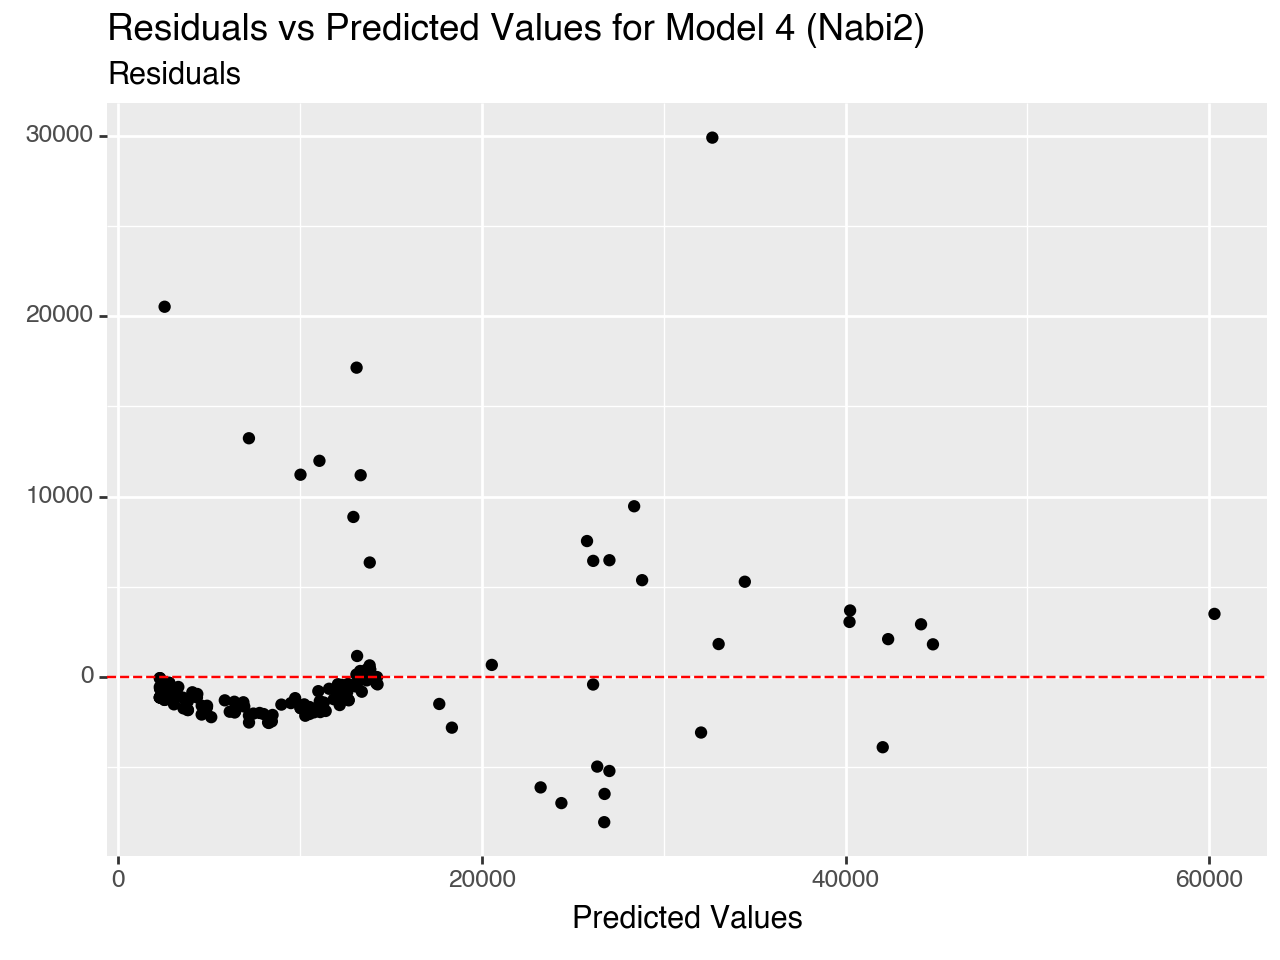

<Figure Size: (640 x 480)>

In [193]:
from plotnine import geom_hline
(ggplot(X_test_nabi2, aes(x = "pred", y = "residuals")) +
    geom_point() +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    labs(
        x = "Predicted Values",
        y = "",
        subtitle = "Residuals",
        title = "Residuals vs Predicted Values for Model 4 (Nabi2)"
    )
)

## Part 5: Full Exploration

In [195]:
#| echo: false
insurance.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [253]:
X_train = insurance[["age", "sex", "bmi", "smoker"]]
X_test = new_data[["age", "sex", "bmi", "smoker"]]

y_train = insurance[["charges"]]
y_test = new_data[["charges"]]

lr = LinearRegression()
enc = OneHotEncoder(sparse_output=False, drop = "first")
# poly = PolynomialFeatures(degree = (1, 2))

ct_dummies = ColumnTransformer(
    [("Dummify", enc, ["smoker", "sex"])],
    remainder="passthrough"
).set_output(transform="pandas")

ct_inter = ColumnTransformer(
    [("Interaction", PolynomialFeatures(interaction_only=True), ["Dummify__smoker_yes", "Dummify__sex_male", "remainder__age", "remainder__bmi"])],
    remainder="drop"
).set_output(transform="pandas")

# ct_poly = ColumnTransformer(
#     [("Square", poly, ["Interaction__remainder__age"])],
#     remainder = "drop"
# ).set_output(transform="pandas")

X_train_dummified = ct_dummies.fit_transform(X_train)
X_train_inter = ct_inter.fit_transform(X_train_dummified)
# X_train_poly = ct_poly.fit_transform(X_train_inter)

my_pipeline = Pipeline(
    [("Dummifying", ct_dummies),
     ("Interaction", ct_inter),
     # ("Square", ct_poly),
     ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

X_test_bass = X_test.copy()
X_test_bass["pred"] = y_pred

r2_bass =  r2_score(y_true = y_test, y_pred = y_pred)
mse_bass = mean_squared_error(y_true = y_test, y_pred = y_pred)
coef_bass = fitted_pipeline.named_steps["ols"].coef_
print(f"R^2: {r2_bass} \nMSE: {mse_bass}")

residuals = y_test - y_pred
X_test_bass["residuals"] = residuals

R^2: 0.859445805786884 
MSE: 21792904.43978922


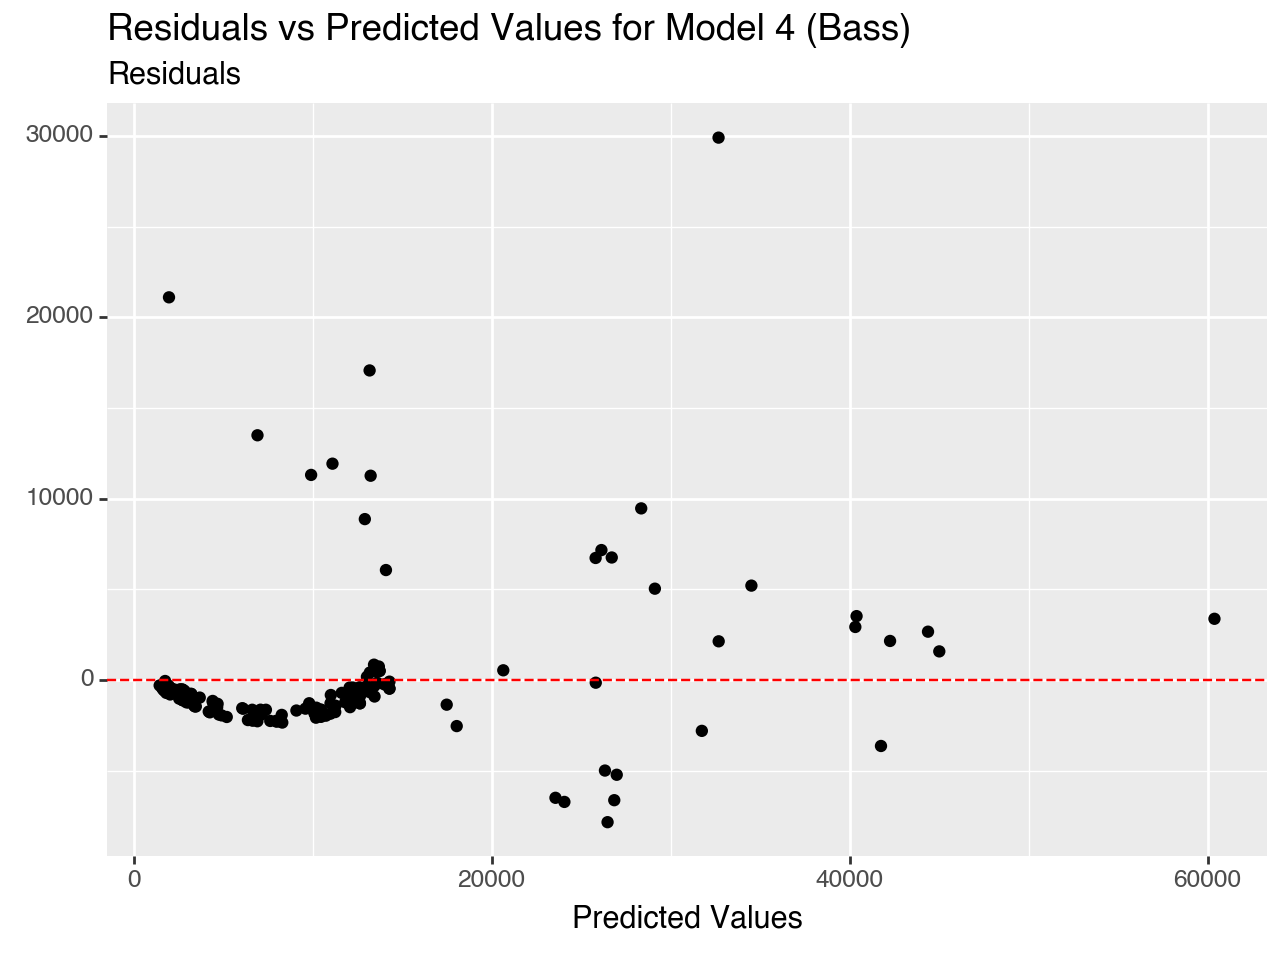

<Figure Size: (640 x 480)>

In [254]:
from plotnine import geom_hline
(ggplot(X_test_bass, aes(x = "pred", y = "residuals")) +
    geom_point() +
    geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
    labs(
        x = "Predicted Values",
        y = "",
        subtitle = "Residuals",
        title = "Residuals vs Predicted Values for Model 4 (Bass)"
    )
)

After trying many different models, the model that I found with the best results was the model that included bmi, age, sex, and smoker.